## Домашнаяя работа 5: Постройте posterior predictive distribution для эксперимента с подбрасываем монеты

### Описание задачи
Мы можем использовать апостериорное прогнозируемое распределение для предсказания того, что произойдет, если мы снова подбросим ту же монету.

Используйте sample_posterior_predictive для генерации выборки k, а затем используйте sns.hist для построения графика апостериорного предсказательного распределения.

Хоть в условиях задачи и сказано, что нужно использовать библиотеку pymc3, но так как эта вервия библиотеки устаревшая, и есть сложности с ее установкой в colab и на домашний компьютер, будем использовать более новую версию - pymc.

### Решение

In [1]:
import numpy as np
import pymc as pm
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az

In [2]:
print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.20.1


Допустим подбросили монетку 1000 раз. И 550 раз выпал орел. Исходя из этого сгенерируем массив с данными.

In [25]:
RANDOM_SEED = 42
n_trials = 1000
n_heads = 550
data = np.concatenate([np.ones(n_heads), np.zeros(n_trials - n_heads)])

Построим модель. Для монеты будем использовать биноминальное распределение.

In [26]:
with pm.Model() as model:
    p = pm.Beta('p', alpha=1, beta=1)
    likelihood = pm.Bernoulli('y', p=p, observed=data)
    trace = pm.sample(2000,
                      tune=500,
                      chains=1,
                      return_inferencedata=False,
                      random_seed=RANDOM_SEED)#2000 экспериментов, прогрем 500

Output()

Предсказание:

In [27]:
posterior_predictive = pm.sample_posterior_predictive(trace,
                                                      model,
                                                      #var_names=["y"],
                                                      random_seed=RANDOM_SEED)

Output()

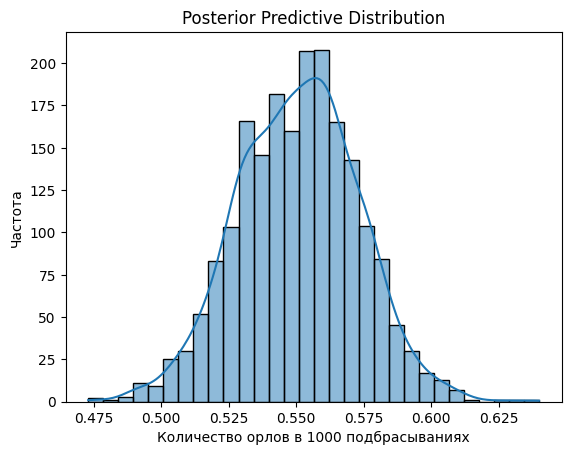

In [29]:

# Построение гистограммы
sns.histplot(np.mean(posterior_predictive["posterior_predictive"]["y"][0], axis=1),
             kde=True,
             bins=30,
             legend=False)
plt.xlabel('Количество орлов в 1000 подбрасываниях')
plt.ylabel('Частота')
plt.title('Posterior Predictive Distribution')
plt.show()

### Вывод
Полученный график распределения вышел не очень красивым, вероятно нужно более количество испытаний. Но пик распределения приходится на 0.55, как мы и задачи в исходных данных. Так что модель отработала верно.